In [1]:
import matplotlib
matplotlib.use("nbagg")

import numpy as np
import matplotlib.pyplot as plt

from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [4]:
def readInPlot(diameter):
    '''
    Read in a text file whose columns are: 1) Percent disorder; 2) Mean mobility; 3) Standard deviation of the mean
    
    Note: we convert the percent disorder into its [nm] equivalent below
    '''
    root = Tk()
    filename = askopenfilename()
    f = open(filename,'r')
    root.withdraw()
    xList = []
    yList = []
    stdList = []
    
    index = 1
    for line in f:
        newline = line.split()

        if len(newline) ==2:
            if index > 1:
                xList.append(float(newline[0])*diameter)
                mobility = float(newline[1])
                yList.append(mobility)
        elif len(newline) == 3:
            if index >1:
                xList.append(float(newline[0])*diameter)
                yList.append(float(newline[1]))
                
                #As the plot contains the std of the mean, we want to bound the data points by our confidence interval
                # of +-t(95%). t(95%) = 1.66
                stdList.append(1.66*float(newline[2]))
        index += 1
    f.close()
    
    xArray = np.asarray(xList)
    yArray = np.asarray(yList)
    
    plotArray = []
    plotArray.append(xArray)
    plotArray.append(yArray)
    if len(stdList) != 0:
        stdArray = np.asarray(stdList)
        plotArray.append(stdArray)
        
    return plotArray

<IPython.core.display.Javascript object>


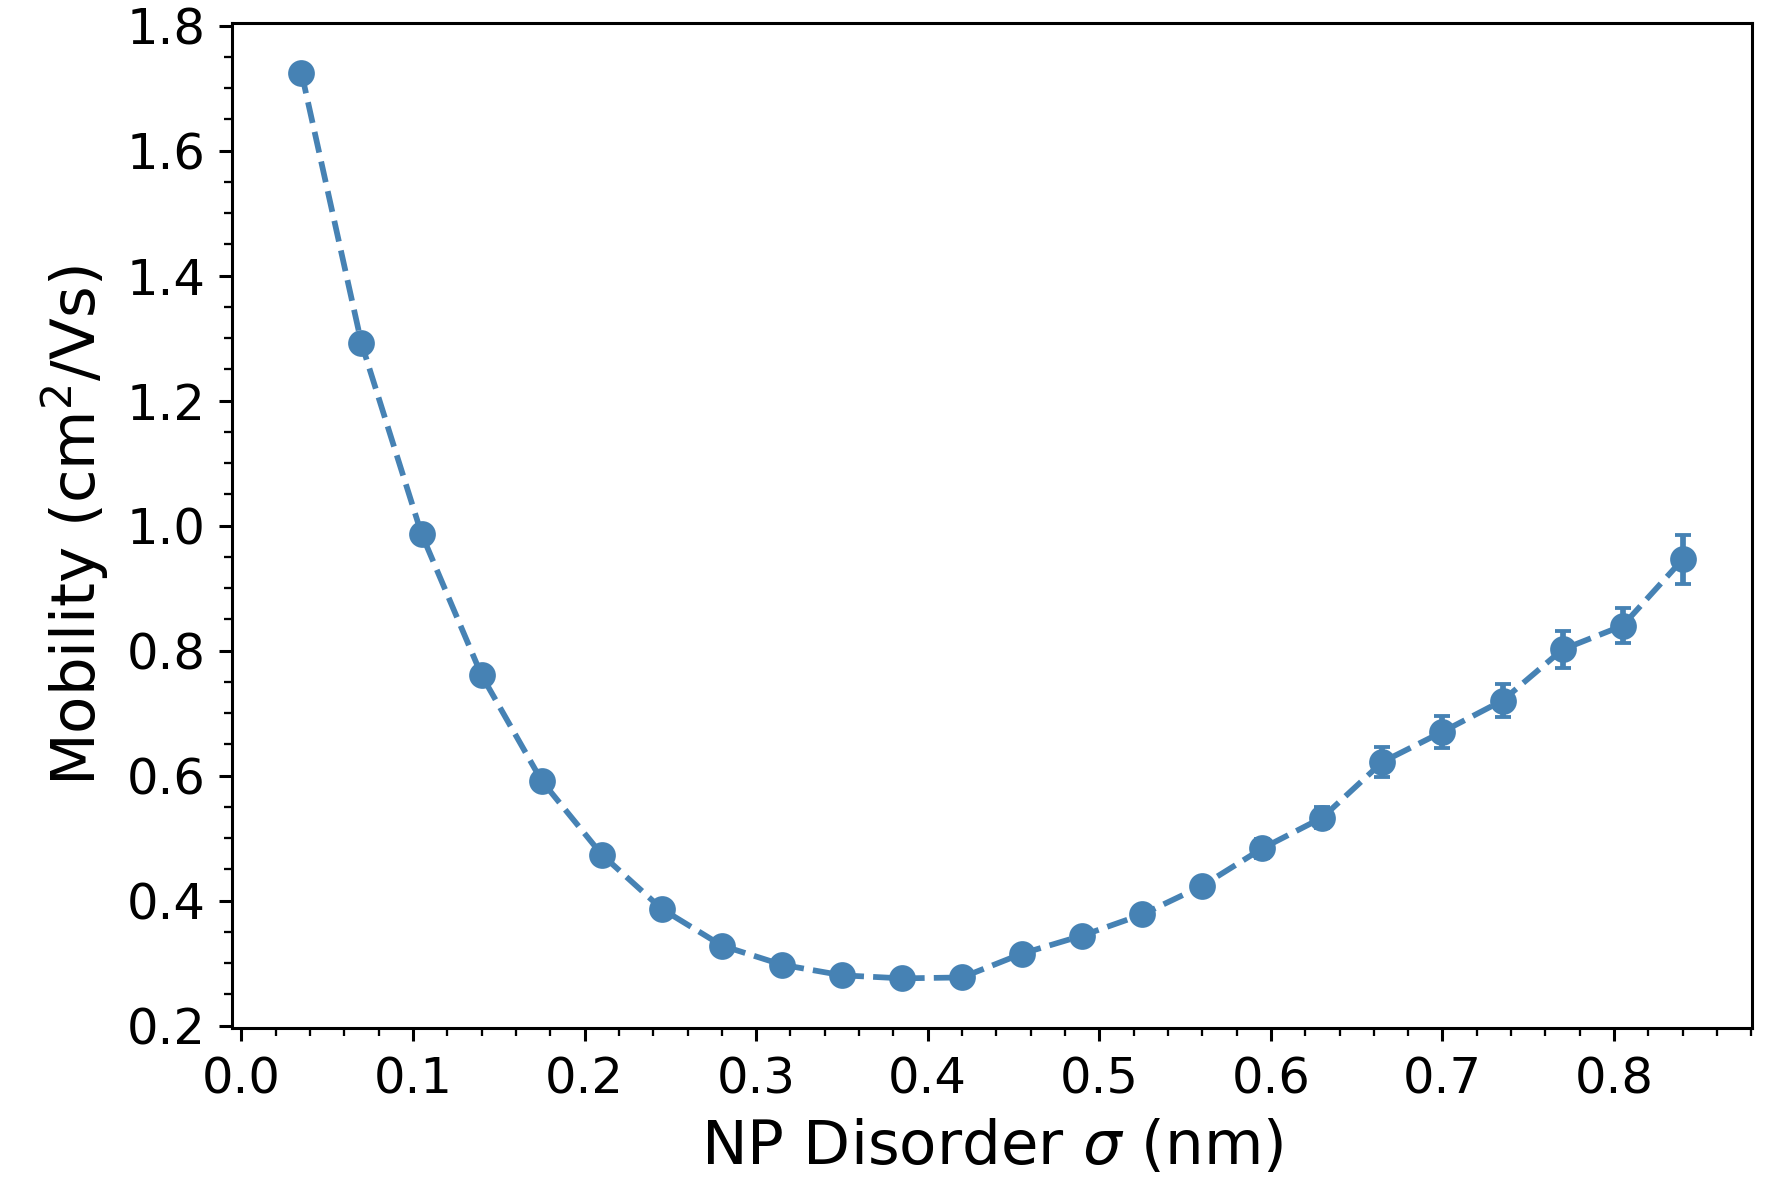

In [8]:
#Here we will plot the results for nanoparticles of diameter 3.5 nm
plotArray = readInPlot(3.5)
xArray = plotArray[0]
yArray = plotArray[1]
stdArray = plotArray[2]

fig, ax = plt.subplots(figsize=(6.5,4.3))
plt.subplots_adjust(left=0.13, bottom = 0.13, right = 0.98, top = 0.98)
markerStyle = 'o'
plotColor = 'steelblue'
plotStyle = '--'

plt.errorbar(xArray,yArray,xerr=None,yerr = stdArray,linestyle = plotStyle,marker = markerStyle, color = plotColor, ecolor=plotColor, capsize = 2)
plt.xlabel("NP Disorder $\sigma$ (nm)",fontsize=16)
plt.ylabel("Mobility (cm$^2$/Vs)",fontsize=16)
ax.minorticks_on()
plt.setp(ax.get_xticklabels(),fontsize=13)
plt.setp(ax.get_yticklabels(),fontsize=13)
plt.savefig('c:/Users/dunru/Pictures/Mobility_vs_Disorder_200K.png', dpi=300, format='png')
plt.show()

